In [61]:
import apexpy as ap
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
#%run /Home/siv30/wad005/master/GRB/src/total_countrate.ipynb #for superimposing plot

# Notes
    -TODO: Retrive all the cord from GUI

In [30]:
#create dictionary for the GRB's containing lon,lat,height and T0
#from dict, convert from geo to apex, then geo to mlat,mlt (magnetic latitude -and longitude)


#entries in d--> 0:lat, 1:lon, 2:height,3:T0, 4:[tshift bkg starts]
#only a handful of burst I have extracted data from
burst_dict = {
     'GRB180720':[37.8596,-159.284,410.5934,'2018-07-20T14:21:47.389',-7], 
     'GRB181222':[50.7801,-131.6614,409.2247,'2018-12-22T20:11:36.576',-175],
     'GRB190206':[-50,26.82059,423.6225,'2019-02-06T03:49:28.525',130],
     'GRB190305':[26.9163,-46.45863,408.6644,'2019-03-05T13:05:19.816',0],
     'GRB190606':[-34.1811,100.9802,421.5565,'2019-06-06T01:55:06.950',-1],
     'GRB200415':[-39.318,-176.2841,434.4084,'2020-04-15T08:48:05.528',-70],
     'GRB200521':[0.45775,57.0965,418.2924,'2020-05-21T12:16:39.818',-103.675],
     'GRB200716':[37.8487,-40.6286,420.9192,'2020-07-16T22:57:40.634',-35.798],
     'GRB201227':[5.80866,-38.40379,418.3365,'2020-12-27T15:14:06.853',-218.23],
     'GRB210424':[-35.9688,-118.9113,429.8141,'2021-04-24T08:01:54.997',-82], 
     'GRB210619':[43.988,110.1651,422.3651,'2021-06-19T23:59:24.915',-206],
     'GRB211211':[49.1766,21.51844,428.,'2021-12-11T13:10:01.323',80]
}

background_dict = {
    'GRB180720':[36.5675,-157.4039,410.3811,'2018-07-20T14:21:28.515'],
    'GRB181222':[51.2343,-149.5426,410.4478,'2018-12-22T20:08:43.576'],
    'GRB190206':[-47.7181,38.54702,422.0741,'2019-02-06T03:51:38.525'],
    'GRB190305':[21.8858,-41.7615,408.3352,'2019-03-05T13:06:52.816'],
    'GRB190606':[-34.1811,100.9802,421.5565,'2019-06-06T01:55:06.950'], #can use background in trigger
    'GRB200415':[-39.318,-176.2841,434.4084,'2020-04-15T08:48:05.528'], #can use background in trigger
    'GRB200521':[-4.7925,53.3727,419.05576,'2020-05-21T12:16:39.818'],
    'GRB200716':[36.4014,-42.7252,420.6514,'2020-07-16T22:57:40.634'],
    'GRB201227':[16.3297,-46.29229,418.2573,'2020-12-27T15:14:06.853'],
    'GRB210424':[-38.5636,-122.4411,430.2817,'2021-04-24T08:00:34.997'],#other bkg triggers aswell
    'GRB210619':[34.8569,94.85486,420.9699,'2021-06-19T23:55:59.915'],
    'GRB211211':[47.0457,29.24223,427.7756,'2021-12-11T13:11:21.323']
}
#have to shift almost every T0 by tshift. Bkg is happening before or after T0

In [5]:
def get_mlat(lat=None,lon=None,alt=None,date_string=None):
    date_time = datetime.fromisoformat(date_string)
    A = ap.Apex(date=date_time)
    # geo to MLT
    mlat, mlt = A.convert(lat, lon, 'geo', 'mlt', datetime=date_time, height=alt)
    return mlat

In [6]:
get_mlat(lat=21.8858,lon=-41.7615,alt=408.3352,date_string='2019-03-05T13:07:06')

23.764583587646484

In [31]:
burst_data = {}
for key,v in burst_dict.items():
    mlat = np.round(get_mlat(lat=v[0],lon=v[1],alt=v[2],date_string=v[3]),4)
    burst_data[key] = [v[0],v[1],v[2],mlat,v[3]] #lat,lon,alt,mlat,T0
    
df_burst = pd.DataFrame(burst_data)
df_burst = df_burst.T
df_burst = df_burst.rename(columns={0: 'lat', 1: 'lon', 2: 'alt', 3: 'mlat', 4: 'time'})

In [32]:
background_data = {}
for key,v in background_dict.items():
    mlat = np.round(get_mlat(lat=v[0],lon=v[1],alt=v[2],date_string=v[3]),4)
    background_data[key] = [v[0],v[1],v[2],mlat,v[3]] #lat,lon,alt,mlat,T0
    
df_background = pd.DataFrame(background_data)
df_background = df_background.T
df_background = df_background.rename(columns={0: 'lat', 1: 'lon', 2: 'alt', 3: 'mlat', 4: 'time'})

In [33]:
print(df_burst.shape)
df_burst

(12, 5)


,lat,lon,alt,mlat,time
GRB180720,37.8596,-159.284,410.5934,38.5434,2018-07-20T14:21:47.389
GRB181222,50.7801,-131.6614,409.2247,55.2793,2018-12-22T20:11:36.576
GRB190206,-50,26.82059,423.6225,-54.2321,2019-02-06T03:49:28.525
GRB190305,26.9163,-46.45863,408.6644,29.9766,2019-03-05T13:05:19.816
GRB190606,-34.1811,100.9802,421.5565,-47.4887,2019-06-06T01:55:06.950
GRB200415,-39.318,-176.2841,434.4084,-45.2905,2020-04-15T08:48:05.528
GRB200521,0.45775,57.0965,418.2924,-15.8446,2020-05-21T12:16:39.818
GRB200716,37.8487,-40.6286,420.9192,39.4085,2020-07-16T22:57:40.634
GRB201227,5.80866,-38.40379,418.3365,14.4085,2020-12-27T15:14:06.853
GRB210424,-35.9688,-118.9113,429.8141,-32.3326,2021-04-24T08:01:54.997


In [34]:
print(df_background.shape)
df_background

(12, 5)


,lat,lon,alt,mlat,time
GRB180720,36.5675,-157.4039,410.3811,37.7022,2018-07-20T14:21:28.515
GRB181222,51.2343,-149.5426,410.4478,52.4233,2018-12-22T20:08:43.576
GRB190206,-47.7181,38.54702,422.0741,-53.9144,2019-02-06T03:51:38.525
GRB190305,21.8858,-41.7615,408.3352,23.7646,2019-03-05T13:06:52.816
GRB190606,-34.1811,100.9802,421.5565,-47.4887,2019-06-06T01:55:06.950
GRB200415,-39.318,-176.2841,434.4084,-45.2905,2020-04-15T08:48:05.528
GRB200521,-4.7925,53.3727,419.05576,-18.9912,2020-05-21T12:16:39.818
GRB200716,36.4014,-42.7252,420.6514,38.4307,2020-07-16T22:57:40.634
GRB201227,16.3297,-46.29229,418.2573,20.8089,2020-12-27T15:14:06.853
GRB210424,-38.5636,-122.4411,430.2817,-35.0397,2021-04-24T08:00:34.997


In [36]:
bkg_cr = np.array([0,9334,10762,4194,7534,6577,3000,4758,2729,4550,3843,6021])
df_background['countrate'] = bkg_cr
df_background

,lat,lon,alt,mlat,time,countrate
GRB180720,36.5675,-157.4039,410.3811,37.7022,2018-07-20T14:21:28.515,0
GRB181222,51.2343,-149.5426,410.4478,52.4233,2018-12-22T20:08:43.576,9334
GRB190206,-47.7181,38.54702,422.0741,-53.9144,2019-02-06T03:51:38.525,10762
GRB190305,21.8858,-41.7615,408.3352,23.7646,2019-03-05T13:06:52.816,4194
GRB190606,-34.1811,100.9802,421.5565,-47.4887,2019-06-06T01:55:06.950,7534
GRB200415,-39.318,-176.2841,434.4084,-45.2905,2020-04-15T08:48:05.528,6577
GRB200521,-4.7925,53.3727,419.05576,-18.9912,2020-05-21T12:16:39.818,3000
GRB200716,36.4014,-42.7252,420.6514,38.4307,2020-07-16T22:57:40.634,4758
GRB201227,16.3297,-46.29229,418.2573,20.8089,2020-12-27T15:14:06.853,2729
GRB210424,-38.5636,-122.4411,430.2817,-35.0397,2021-04-24T08:00:34.997,4550


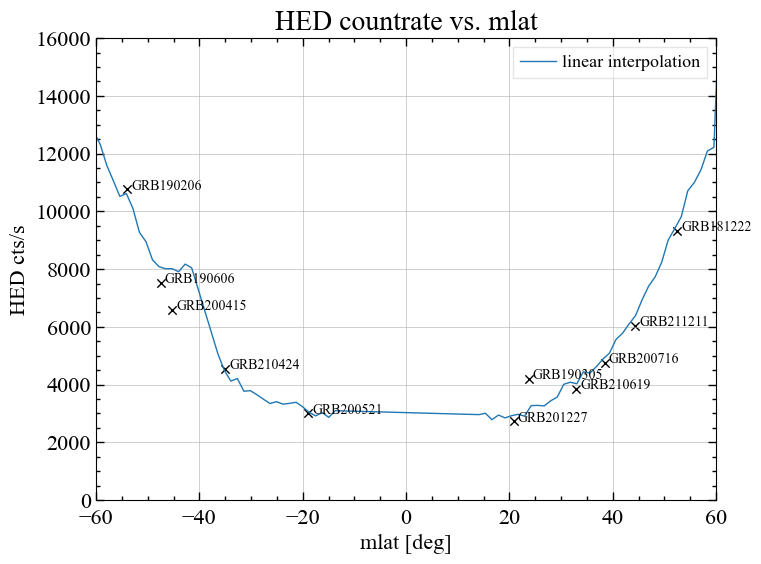

In [67]:
import matplotlib.pyplot as plt

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Select count rates with a non-zero value
df_nonzero = df_background[df_background['countrate'] > 0]

# Scatter plot of y = countrate and x = mlat
ax.scatter(df_nonzero['mlat'], df_nonzero['countrate'], color='black')

# Label the axes
ax.set_xlabel('mlat (°)')
ax.set_ylabel('count rate (cts/s)')

# Add a title
ax.set_title('Count rate vs mlat')

# Limit the x and y axes
ax.set_xlim(-60, 60)
ax.set_ylim(0, 16000)

# Add grid lines


# Annotate each scatter point with the GRB identification
for i, txt in enumerate(list(df_background.T.keys())[1:]):
    ax.annotate(txt, (df_nonzero['mlat'][i]+ 0.8, df_nonzero['countrate'][i]))

# Show the plot
filtered_df = df[df['hed_countrate'] > 2000]

# Interpolate hed_countrate as a function of mlat
x = filtered_df['mlat']
y = filtered_df['hed_countrate']
f = interp1d(x, y,kind='linear')

# Generate evenly spaced values for mlat
x_new = np.linspace(x.min(), x.max(), num=100, endpoint=True)

# Evaluate the interpolated function at the new values for mlat
y_new = f(x_new)

# Plot the result
plt.plot(x_new, y_new,label='linear interpolation')

# Add grid and cap y-axis at 16000
plt.grid()
plt.ylim(0, 16000)

# Add labels
plt.title('HED countrate vs. mlat')
plt.xlabel('mlat [deg]')
plt.ylabel('HED cts/s')
plt.legend()
plt.savefig('/Home/siv30/wad005/master/GRB/pyplots/HED_countrate.png')
plt.show()

I have gone through the trigger data and ratemeter data for all the gamma ray burst candidates (GRB's). I extracted the latitude, longitude, altitude and calculated the magnetic latitude for the trigger burst and the background data. I also did a seperate analysis for the burst GRB190305A. In this analysis I extracted the countrate for around 180 minutes, which is equivalent to two orbits for the international space station (ISS). The countrate is extracted on a 30 second time interval. I preformed a linear interpolation of the data i retrived. When superimposing the countrates I found for the background with the linear interpolation, the data matches very good. The reason we get a bad agreement with the Konus Wind spacecraft when preforming a joint spectral analysis, must be found somewhere else. There are no decimation problems for ASIM for our GRB's.